# Contours in OpenCV

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img=cv2.imread('i4.jpg')
im = img.copy()

In [3]:
imgray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,th=cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [4]:
contours, hierarchy=cv2.findContours(th,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [5]:
print("Number of Contours found = " + str(len(contours)))

Number of Contours found = 85


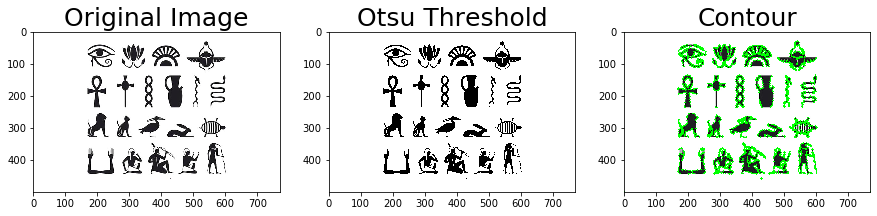

In [6]:
for i in range(len(contours)):
    cv2.drawContours(img, contours[i], -1, (0,255,0), 3)

plt.figure(figsize=(15, 10))
plt.subplot(131),plt.imshow(im, 'gray')
plt.title('Original Image', fontsize=25)
plt.subplot(132),plt.imshow(th, 'gray')
plt.title('Otsu Threshold', fontsize=25)
plt.subplot(133),plt.imshow(img, 'gray')
plt.title('Contour', fontsize=25)
plt.show()

## Class

In [7]:
img= cv2.imread('puma1.png')
im = img.copy()
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,th=cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [8]:
contours, hierarchy=cv2.findContours(th,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print("Number of Contours found = " + str(len(contours)))

Number of Contours found = 2


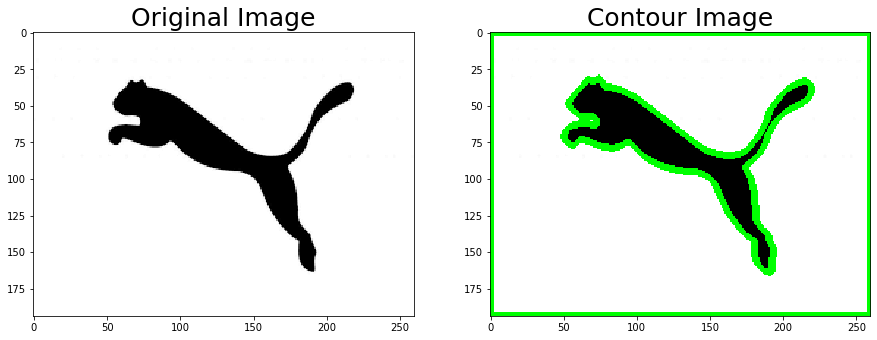

In [9]:
im = cv2.drawContours(img, contours, -1, (0,255,0), 3)
    
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(imgray, 'gray')
plt.title('Original Image', fontsize=25)
plt.subplot(122),plt.imshow(im, 'gray')
plt.title('Contour Image', fontsize=25)
plt.show()

In [10]:
cnt = contours[1]
M = cv2.moments(cnt)
print(M)

{'m00': 5153.5, 'm10': 669546.6666666666, 'm01': 407182.6666666666, 'm20': 97667100.75, 'm11': 56542666.95833333, 'm02': 36559071.75, 'm30': 15488246005.900002, 'm21': 8595572471.083334, 'm12': 5433172328.383333, 'm03': 3684983583.5, 'mu20': 10679085.062710896, 'mu11': 3641183.075319633, 'mu02': 4387203.304520667, 'mu30': 24391661.525161743, 'mu21': -67323523.98674929, 'mu12': 108003434.33067715, 'mu03': 103144715.25316334, 'nu20': 0.4020957521038586, 'nu11': 0.1371001577963669, 'nu02': 0.16518978938781473, 'nu30': 0.012793391312381356, 'nu21': -0.035311091292509436, 'nu12': 0.05664764563283571, 'nu03': 0.054099254479922865}


In [11]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [12]:
(w,h,c) = img.shape

In [13]:
img = np.zeros(im.shape, np.uint8)
img = cv2.circle(img,(cx,cy),3,(255,255,0),2)
img = cv2.drawContours(img, contours[1], -1, (0,255,0), 3)

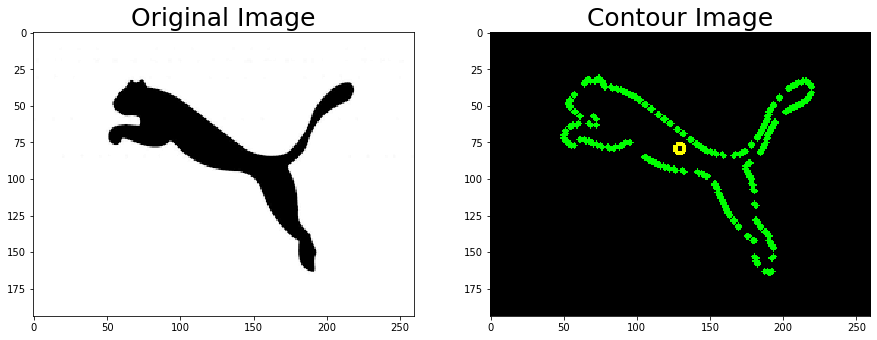

In [14]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(imgray, 'gray')
plt.title('Original Image', fontsize=25)
plt.subplot(122),plt.imshow(img, 'gray')
plt.title('Contour Image', fontsize=25)
plt.show()

### Contour Approximation

In [15]:
epsilon = 0.1*cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)

In [16]:
imgA = np.zeros(im.shape, np.uint8)
imgA = cv2.drawContours(imgA, [approx], -1, (0,255,0), 3)

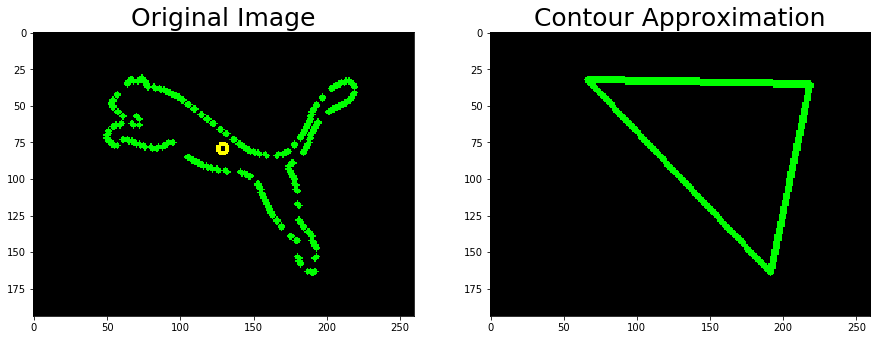

In [17]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(img, 'gray')
plt.title('Original Image', fontsize=25)
plt.subplot(122),plt.imshow(imgA, 'gray')
plt.title('Contour Approximation', fontsize=25)
plt.show()

### Convex Hull

In [18]:
hull=cv2.convexHull(cnt)

In [19]:
imgb = img.copy()
imgb = cv2.drawContours(imgb, [hull], -1, (255,0,0), 3)

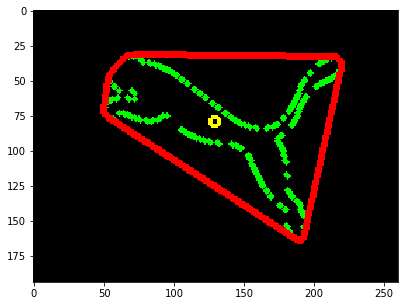

In [20]:
plt.figure(figsize=(9, 5))
plt.imshow(imgb, 'gray')
plt.show()

### Minimum Enclosing Circle

In [21]:
(x,y),radius=cv2.minEnclosingCircle(cnt)
center=(int(x),int(y))
radius=int(radius)
img=cv2.circle(img,center,radius,(255,0,0),2)

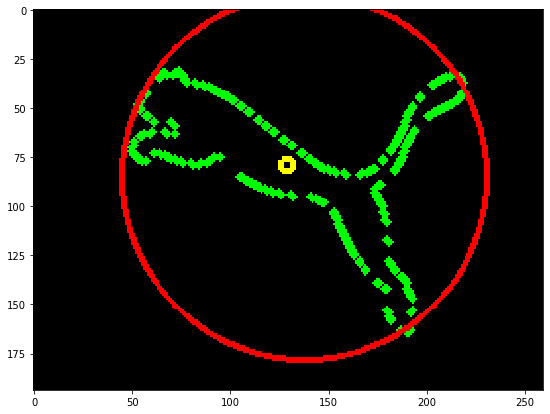

In [22]:
plt.figure(figsize=(10, 7))
plt.imshow(img, 'gray')
plt.show()